-------
_Sorbonne Université, M1 SPI: MF2A & CompMech_
## 4MEF03/MFC -  Notebook des exercices du  TD1 
-------

_Import des librairies usuelles python_

In [1]:
from scipy.optimize  import fsolve
from pylab           import *

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

_Déclaration des fonctions MFC_

In [2]:
## Fonctions Python MFC (CF Cours Chap.2)

def func_Pt_P(gam,M):
    # total to static pressure (LIB_ipynb = isentropic_flow_v2)
    out =  (1+0.5*(gam-1)*M**2)**(gam/(gam-1))
    return out

def func_A_Ac(x, gam, A_Ac):
    # Ratio A/A_c
    out =  A_Ac - 1./x * ( 2./(gam+1.) *(1. + 0.5*(gam-1)*x**2))**(0.5*(gam+1)/(gam-1))  
    return out

def func_Tt_T(gam,M):
    # total to static temperature (LIB_ipynb = isentropic_flow_v2)
    out =  (1+0.5*(gam-1)*M**2)
    return out

# -----------------------------------------------------

# Test :
func_Tt_T(1.3, 1.5)

1.3375


-------
## Exercice 1 : Grandeurs totales

**Un écoulement supersonique dans une tuyère divergente est caractérisé par les conditions d'entrées suivantes: $M_1=2$ et $P_1 = 2 \times 10^5 Pa$. On souhaite obtenir une nombre de Mach en sortie $M_2=3$.**

**Donner la valeur de la pression statique  de sortie $P_2$ permettant de satisfaire cette condition.**

--------

_Données du problème:_

In [3]:
gam  = 1.4
M1   = 2.
P1   = 2*10**5
M2   = 3

**SOLUTION**

Ecrivons : $\displaystyle P_2 = \dfrac{P2}{P1}\times P1 = \dfrac{P2}{P_{t2}}\dfrac{P_{t2}}{P_{t1}}\dfrac{P_{t1}}{P_{1}}\times P1 $ 

Sachant que l'écoulement est isentropique, nous avons que :
$\dfrac{P_{t2}}{P_{t1}} = 1$

d'où $P_2 \dfrac{P2}{P_{t2}}\dfrac{P_{t1}}{P_{1}}\times P1 = P1\times \frac{f(M_1)}{f(M_2)} \approx 40.10^5$ Pa

One then must reduce pressure to a fifth of P1 to get M2 = 3 when M1 = 2. IT implies high pressure reduction for low Mach number increasement.

The behavior of P decresing is good from $\frac{dP}{P} = -\gamma\frac{M^2}{M^2 - 1}\frac{dA}{A}$ where $dA > 0$ and so $dP < 0$ as expected.

**Application numérique**

In [4]:
Pt1_p1 = func_Pt_P(gam,M1)
P2_pt2 = 1/func_Pt_P(gam,M2)
P2     = P1 * Pt1_p1 * P2_pt2

print('La pression statique en sortie de divergent est égale à:\nP_2 = %4.2f'%P2, '[Pa]')
print(P1/P2)

La pression statique en sortie de divergent est égale à:
P_2 = 42602.07 [Pa]
4.69460807924449


La pression statique requise pour obtenir $M=3$ en sortie doit donc être environ **5 fois inférieure** à celle d'entrée.

-------

## Exercice 2 : Grandeurs critiques

**On considère une conduite convergente-divergente, de section circulaire, et dont la pression totale d'entrée est fixée à $P_{t_1}= 2.2 \times 10^5 $ Pa. La valeur du nombre de Mach en sortie est $M_2=0.4$. Les diamètres des sections au col et en sortie valent respectivement $D_{col}=10$ mm et $D_2 = 12$ mm.**

**Calculer la valeur de la pression au col $P_{col}$ sachant que l'écoulement est isentropique.**

-------

_Données du problème :_

In [5]:
Pt1  = 2.2*10**5
M2   = .4
Dcol = 10*10**-3
D2   = 12*10**-3

**SOLUTION**

Soit $D_{col}$  le diamètre de la section au niveau du col de la tuyère.
Appliquons la relation $A/A_c=\mathcal f(M)$ pour la section de sortie $A_2$.

Naturellement, cette expression sous-entend que la section au col est critique, et ce de manière fictive ou critique.

L'application numérique donne :

In [6]:
c2      = 0.5*(gam+1.)/(gam-1.)
A2_Ac   = 1./M2 * ( 2./(gam+1.) *(1. + 0.5*(gam-1)*M2**2))**(0.5*(gam+1)/(gam-1))  
D2_Dc   = np.sqrt(A2_Ac)

print ('M_2   = %4.2f'%M2   )
print ('A2/Ac = %4.2f'%A2_Ac)

M_2   = 0.40
A2/Ac = 1.59


<ipython-input-7-06d6e62696bf>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(M, (1./M * ( 2./(gam+1.) *(1. + 0.5*(gam-1)*M**2))**(0.5*(gam+1)/(gam-1)))**-1)


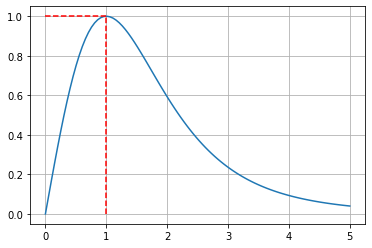

In [7]:
M = np.linspace(0, 5, 100)

plt.plot(M, (1./M * ( 2./(gam+1.) *(1. + 0.5*(gam-1)*M**2))**(0.5*(gam+1)/(gam-1)))**-1)
plt.plot([1,1], [0,1], 'r--')
plt.plot([0,1], [1,1], 'r--')

plt.grid('True')

Par  ailleurs, la géométrie de la tuyère donne comme valeur du rapport $A_2/A_{col}$ ($\underline{\text{physical value}}$) = $\frac{D_2^2}{D_{col}^2} = 1.44$

In [8]:
A2_Acol = 1.44
print ('A2/Acol = %4.2f'%A2_Acol)

A2/Acol = 1.44


Pour avoir M = 1 au cool on doit avoir $\frac{A2}{Ac} = 1.59$. Or, on a ici $\frac{A2}{Ac} = 1.44$ tel que $A_col \gt A_c$, i.e. on a pas encore atteint la section minimale.

On ne peut donc pas utiliser la relation $A_{col} = A_c$ pour obtenir des informations sur les données au col.

Cependant, $\displaystyle
\frac{A_{col}}{A_c} = \dfrac{A_{col}}{A_2}\times\dfrac{A_2}{A_c}$ 

**Application numérique** :

In [9]:
Acol_Ac = 1/A2_Acol * A2_Ac
print ('Acol/Ac = %4.2f'%Acol_Ac)

Acol/Ac = 1.10


La valeur du nombre de Mach au col s'obtient donc en résolvant la relation sur le rapport de la section courante à la section critique :

$\displaystyle \frac{A_{col}}{A_c} = \dfrac{1}{M_2} \times ( {2}{(\gamma+1)} \times (1 + \dfrac{\gamma-1}{2}M_2^2))^{\dfrac{(\gamma+1)}{2(\gamma-1)}}$

Cela peut se résoudre numériquement en recherchant les racines  de la fonction

$\displaystyle f(M_{col}) = \frac{A_{col}}{A_c} - \dfrac{1}{M2} \times ( {2}{(\gamma+1.)} \times (1. + 0.5(\gamma-1).M2^2))^{(\dfrac{\gamma+1)}{2(\gamma-1)}}
$

In [10]:
initval = 0.6
val    = fsolve(func_A_Ac, initval, args=(gam, Acol_Ac))
M_col  = val[0]
print ('Mach at the throat section, M_col = %4.2f'%M_col)

Mach at the throat section, M_col = 0.69


_Remarque_  : Ce résultat peut se retrouver graphiquement à partir de la courbe $A_c/A=\mathcal f(M)=0.905$  et en considérant la solution **subsonique** naturellement.

L'écoulement étant isentropique, on a $P_{t_{col}} = $............................... 

La pression statique au niveau du col s'obtient alors par :

$\displaystyle P_{col} = ..............................................................................................................$


**Application numérique** :

In [11]:
P_col = Pt1 / func_Pt_P(gam, M_col)
print ('P_col = %4.2f'% P_col, '[Pa]')

P_col = 160465.11 [Pa]




-----------------------------
## Exercice 3 : Soufflerie supersonique

**Une soufflerie composée d’un convergent puis d’un divergent est alimentée par
un écoulement tq: $M_1 ≈ 0$, $P_{t_1} = 8 × 10^5$ Pa et $T_{t_1} = 300$ K. Ces conditions
permettent d’obtenir en sortie de convergent un écoulement supersonique isentropique. La section au col est $A_{col} = 0.15 m^2$ et la section en sortie de divergent est $A_2 = 0.253$ $m^2$.**

-----------------------------

_Mise en données:_

In [15]:
g     = 1.4
r     = 287
Pt1   = 8*10**5
Tt1   = 300
A_col = 0.15
A_2   = 0.253

**1) Décrire le régime de l’écoulement dans toute la tuyère en précisant la
valeur du nombre de Mach au col.**

cf cas du cours : retour à subsonic, continue vers upersonic avant retour, pas de retour (shock waves, etc).

**2) Calculer les grandeurs suivantes au col: $\rho, P , T , U$ et $a$.**

The flow is isnetropic, so every total greatness conserve.

In [22]:
# Critical conditions from total conditions (see Chap. 2)
T_col   = 2/(g+1)*Tt1
P_col   = ((g+1)/2)**(-g/(g-1)) * Pt1
rhot1   = Pt1/r/Tt1
rho_col = ((g+1)/2)**(-1/(g-1)) * rhot1
a_col   = np.sqrt(g * r* T_col)

print ('T_col = %4.2f'%T_col,'[K]')
print ('P_col = %4.2f'%P_col,'[Pa]')
print ('r_col = %4.2f'%r_col,'[kg/m^3]')
print ('a_col = %4.2f'%a_col,'[m/s]')

T_col = 250.00 [K]
P_col = 422625.43 [Pa]
r_col = 5.89 [kg/m^3]
a_col = 316.94 [m/s]


**3) En déduire la valeur du débit massique.**

We use formula m = rho * u * A, with u = a here as we reach sonic speed at throat.

In [24]:
m_dot = rho_col * A_col * a_col
print ('mass flow = %4.2f'%m_dot,'[kg/s]')

mass flow = 280.03 [kg/s]


**4) Comment déterminer le nombre de Mach $M_2$ en sortie ?**

Le col étant sonique, nous avons $A_c = A_{col}$

Il est donc possible de déterminer le Mach en sortie connaissant le rapport $\frac{A_2}{A_c}$, by graphic interpretation of relation


$$\frac{A_2}{A_c} = \frac{1}{M_2}\left[ \frac{A_2}{A_c}(1 + \frac{\gamma - 1}{2}M_2^2) \right]^{\frac{\gamma+1}{2(\gamma-1)}}$$

ou par sa résolution numérique ci-dessous, comme dans le cas de l'exercice 2.

In [38]:
A2_Ac   = A_2/A_col
initval = 1.5

val     = fsolve(func_A_Ac, initval, args=(gam, A2_Ac))
M2      = val[0]

print ('Mach at the exit section:\nM_2 = %4.2f'%M2)

Mach at the exit section:
M_2 = 2.00


_Remarque:_ On aurait egalement pu trouver $M_2$ par résolution de la relation fondamentale du débit massique.

**5) Etablir alors les valeurs de $\rho, P , T , U$ et $a$ en sortie de tuyère.**

In [39]:
P2   = ((g+1)/2)**(-g/(g-1)) * P_col
T2   = 2/(g+1)*T_col
rho2 = P2/r/T2
a2   = np.sqrt(g * r * T2)
U2   = M2/a2

T_col   = 2/(g+1)*Tt1
P_col   = ((g+1)/2)**(-g/(g-1)) * Pt1
rhot1   = Pt1/r/Tt1
rho_col = ((g+1)/2)**(-1/(g-1)) * rhot1
a_col   = np.sqrt(g * r* T_col)

print ('P2   = %4.2f'%P2,'[Pa]')
print ('T2   = %4.2f'%T2,'[K]')
print ('rho2 = %4.2f'%rho2,'[kg/m^3]')
print ('U2   = %4.2f'%U2,'[m/s]')

P2   = 223265.32 [Pa]
T2   = 208.33 [K]
rho2 = 3.73 [kg/m^3]
U2   = 0.01 [m/s]


**_Fin de ce noteebook_**


-------
_J-C Chassaing, Sorbonne Université , Jan. 2021_